AST 304 F22
Joe Epley, Elias Taira, Erin Syerson, Michael Bellaver

In [ ]:
########################################################################
# MSU Hollow Earth Society: 
# Joe Epley, Elias Taira, Erin Syerson, Michael Bellaver
# AST 304, Fall 2020
# Michigan State University
########################################################################

"""
This module sets up each of the 3 ODEs (forward euler, 2nd-order Runge-Kutta, 
and 4th-order Runge-Kutta). It does this by defining 3 separate functions to 
determine what each ODE does when it is calculated.

"""

# all routines that take a single step should have the same interface
# fEuler is complete, except for documentation. you can use this as a pattern 
# for the other two routines.
def fEuler(f,t,z,h,args=()):
    """
    This sets up the forward Euler ODE. It defines it as a function that takes 
    in a function (f), time(t), position (z), time-step (h), and other arguments 
    (args). This function returns the new position (new_z) as z+h*f(t,z,*args).
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        <fill this in>
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
    
    # The following trick allows us to pass additional parameters to f
    # first we make sure that args is of type tuple; if not, we make it into
    # that form
    if not isinstance(args,tuple):
        args = (args,)
    
    # when we call f, we use *args to pass it as a list of parameters.
    # for example, if elsewhere we define f like
    # def f(t,z,x,y):
    #    ...
    # then we would call this routine as
    # znew = fEuler(f,t,z,h,args=(x,y))
    #
    return z + h*f(t,z,*args)

# You will need to flesh out the following routines for a second-order
# Runge-Kutta step and a fourth order Runge-Kutta step.

def rk2(f,t,z,h,args=()):
    """
    This sets up the 2nd-order Runge-Kutta by defining it as a function which 
    takes in a function (f), time (t), position (z), time-step (h), and other 
    arguments (args). Inside the function, initial acceleration is calculated 
    (k1z) which is used to find the new acceleration (k2z). The function returns 
    the new position (new_z) as z+k2z*h.
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        <fill this in>
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """

    if not isinstance(args,tuple):
        args = (args,)
    
    # detemines initial acceleration
    k1z =  f(t, z, *args)
            
    # moves acc forwards by 1 timestep
    k1z = k1z*h
            
    # finds new acc from k1
    k2z = f(t+h/2, z+0.5*k1z, *args)
            
    # changes r/v in next time step based on val from k2
    # also moves k2 forward a timestep when using
    znew = z+k2z*h

    return znew

def rk4(f,t,z,h,args=()):
    """
    This sets up the 4th-order Runge-Kutta by defining it as a function which 
    takes in a function (f), time (t), position (z), time-step (h), and other 
    arguments (args). It finds old and new acceleration values four times, 
    before returning the new position (new_z) as z+k4z*h.
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        <fill this in>
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
   
    if not isinstance(args,tuple):
        args = (args,)
    # detemines initial acc, moves it forward by 1 timestep
    k1z =  f(t,z,*args)
    k1z = k1z*h 
    
    # # finds new acc from k1, moves it forward by 1 timestep
    k2z =  f(t+h/2,z+0.5*k1z,*args)
    k2z = k2z*h 
    
    # # finds new acc from k2, moves it forward by 1 timestep
    k3z =  f(t+h/2,z+0.5*k2z,*args)
    k3z = k3z*h 
    
    # # finds new acc from k3, moves it forward by 1 timestep in final line
    k4z = f(t+h/2,z+0.5*k3z,*args)
    
    # # changes r/v in next time step based on val from k4
    znew = z+k4z*h
    return znew
##Footer
##© 2022 GitHub, Inc.

In [ ]:
########################################################################
# MSU Hollow Earth Society: 
# Joe Epley, Elias Taira, Erin Syerson, Michael Bellaver
# AST 304, Fall 2020
# Michigan State University
########################################################################

"""
<Description of this module goes here: what it does, how it's used.>
kinetic_energy uses the velocity array to calculate the kinetic energy at any point

potential_energy uses the position array and the mass to find the potential 
  energy at any point

total_energy uses the array of positions and velocities as well as the mass to 
  calculate the total energy at any point, verifying that it is conserved

derivs takes in the current time, array of positions and velocities, and the 
  mass and computes the derivatives of position and velocity

integrate_orbit takes in the initial positions and velocities, the mass, the end 
  time, the time step, and the method of integration to integrate the orbit 

set_initial_conditions takes in the semi-major axis, the mass, and the 
  eccentricity to calculate the initial conditions
"""

import numpy as np
from numpy.linalg import norm
# ode.py is your routine containing integrators
#from ode import fEuler, rk2, rk4

# use this to identify methods
integration_methods = {
    'Euler':fEuler,
    'RK2':rk2,
    'RK4':rk4
    }
    
# energies
def kinetic_energy(v):
    """
    Returns kinetic energy per unit mass: KE(v) = 0.5 v*v.
    
    Arguments
        v (array-like)
            velocity vector
    """
    return 0.5*np.dot(v,v)

def potential_energy(x,m):
    """
    Returns potential energy per unit mass: PE(x, m) = -m/norm(r)
    Arguments
        x (array-like)
            position vector
        m (scalar)
            total mass in normalized units
    """
    # the norm function returns the length of the vector
    r = norm(x)
    return -m/r

def total_energy(z,m):
    """
    Returns energy per unit mass: E(z,m) = KE(v) + PE(x,m)
    Arguments
        
        z (array-like)
            x and y postions and velocities
        m (scalar)
            total mass in normalized units
    """
    # to break z into position, velocity vectors, we use array slices:
    # here z[n:m] means take elements of z with indices n <= j < m
    r = z[0:2]  # start with index 0 and take two indices: 0 and 1
    v = z[2:4]  # start with index 2 and take two indices: 2 and 3

    # replace the following two lines
    TE = potential_energy(r,m) + kinetic_energy(v)

    return TE

def derivs(t,z,m):
    """
    Computes derivatives of position and velocity for Kepler's problem 
    
    Arguments
        
        t (scalar)
            time at an instant
        z (array-like)
            x and y postions and velocities
        m (scalar)
            total mass in normalized units
    Returns
        numpy array dzdt with components [ dx/dt, dy/dt, dv_x/dt, dv_y/dt ]
    """
    # Fill in the following steps
    # 1. split z into position vector and velocity vector (see total_energy for example)
    r = z[0:2]
    v = z[2:4]
    # 2. compute the norm of position vector, and use it to compute the force
    r_norm = norm(r)
    # 3. compute drdt (array [dx/dt, dy/dt])
    drdt = v
    # 4. compute dvdt (array [dvx/dt, dvy/dt])
    # G = 39.4784
    dvdt = -m*r/r_norm**3
    # join the arrays
    dzdt = np.concatenate((drdt,dvdt))
    return dzdt

def integrate_orbit(z0,m,tend,h,method='RK4'):
    """
    Integrates orbit starting from an initial position and velocity from t = 0 
    to t = tend.
    
    Arguments:
        z0 (array-like)
            array of initial postions and velocities
        m (scalar)
            total mass in normalized units
    
        tend (scalar)
            end time of orbit map
    
        h (scalar)
            time step
    
        method ('Euler', 'RK2', or 'RK4')
            identifies which stepper routine to use (default: 'RK4')
    Returns
        ts, Xs, Ys, KEs, PEs, TEs := arrays of time, x postions, y positions, 
        and energies (kin., pot., total) 
    """

    # set the initial time and phase space array
    t = 0.0
    z = z0

    # expected number of steps
    Nsteps = int(tend/h)+1

    # arrays holding t, x, y, kinetic energy, potential energy, and total energy
    ts = np.zeros(Nsteps)
    Xs = np.zeros(Nsteps)
    Ys = np.zeros(Nsteps)
    KEs = np.zeros(Nsteps)
    PEs = np.zeros(Nsteps)
    TEs = np.zeros(Nsteps)

    # store the initial point
    ts[0] = t
    Xs[0] = z[0]
    Ys[0] = z[1]
    # now extend this with KEs[0], PEs[0], TEs[0]
    KEs[0] = kinetic_energy(z[2:4])
    PEs[0] = potential_energy(z[0:2], m)
    TEs[0] = total_energy(z, m)

    # select the stepping method
    advance_one_step = integration_methods[method]
    # run through the steps
    for step in range(1,Nsteps):
        z = advance_one_step(derivs,t,z,h,args=m)
        # insert statement here to increment t by the stepsize h
        t+=h
        # store values
        ts[step] = t
        # fill in with assignments for Xs, Ys, KEs, PEs, TEs
        Xs[step] = z[0]
        Ys[step] = z[1]
        KEs[step] = kinetic_energy(z[2:4])
        PEs[step] = potential_energy(z[0:2], m)
        TEs[step] = total_energy(z, m)
        
    return ts, Xs, Ys, KEs, PEs, TEs
    
def set_initial_conditions(a, m, e):
    """
    set the initial conditions for the orbit.  The orientation of the orbit is 
    chosen so that y0 = 0.0 and vx0 = 0.0.
    
    Arguments
        a
            semi-major axis in AU
        m
            total mass in Msun
        e
            eccentricity ( x0 = (1+e)*a )
    
    Returns:
    x0, y0, vx0, vy0, eps0, Tperiod := initial position and velocity, energy, 
        and period
    """
        
    # fill in the following lines with the correct formulae
    # total energy per unit mass
    eps0 = -m/(2*a)
    # period of motion
    Tperiod = (np.pi/np.sqrt(2))*m*abs(eps0)**(-3/2)

    # initial position
    # fill in the following lines with the correct formulae
    x0 = (1+e)*a
    y0 = 0.0

    # initial velocity is in y-direction; we compute it from the energy
    # fill in the following lines with the correct formulae
    vx0 = 0.0
    vy0 = np.sqrt(2*eps0+(2*m/x0))
    
    return np.array([x0,y0,vx0,vy0]), eps0, Tperiod

In [ ]:
m = 1
a = 1
e = .5
z0, eps0, Tperiod = set_initial_conditions(a, m, e)

In [ ]:
hlist = []
 
for i in range(0,10+1):
    h_new = 0.1*Tperiod / 2**i
    hlist.append(h_new)

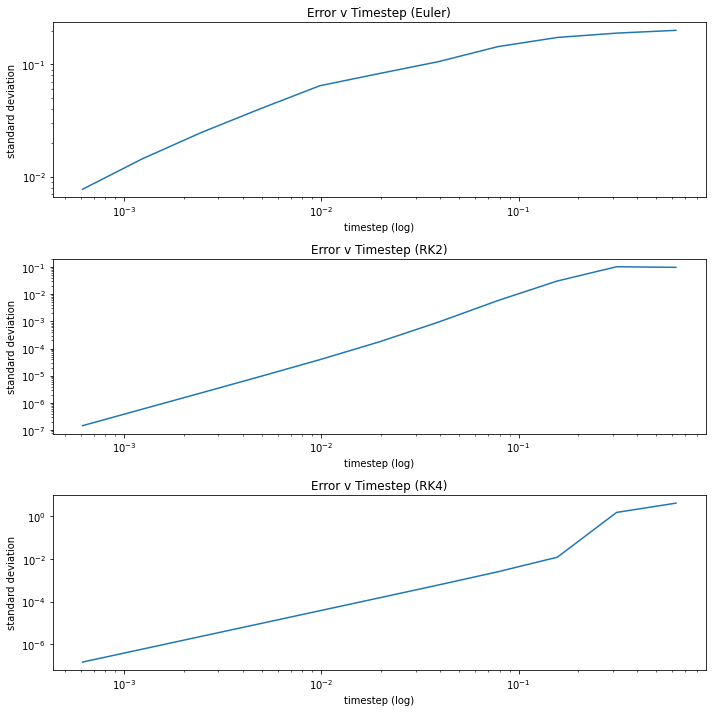

In [ ]:
import matplotlib.pyplot as plt

method_list = ["Euler","RK2","RK4"]

fig, ax = plt.subplots(3,1, figsize = [10,10])

for i, method in enumerate(method_list):
  errlist = []
  for h in hlist:
    tend = 3*Tperiod
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h, method)
    err = np.std(TEs)
    errlist.append(err)
  
  ax[i].plot(hlist,errlist)
  ax[i].set_title(f'Error v Timestep ({method})')
  ax[i].set_xlabel('timestep (log)')
  ax[i].set_ylabel('standard deviation')
  ax[i].set_xscale('log')
  ax[i].set_yscale('log')
plt.tight_layout()

4. 
Yes, the error does scale as expected. As we decrease the size of h, the space between each iteration becomes smaller, allowing the methods to create more accurate results. When plotting, we found that it was better to use a logarithmic scale as the plot formed a straighter line once we rescaled it

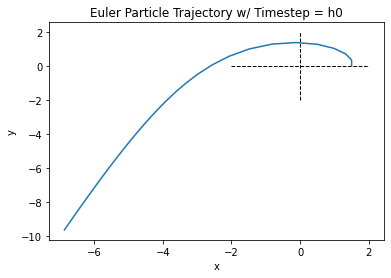

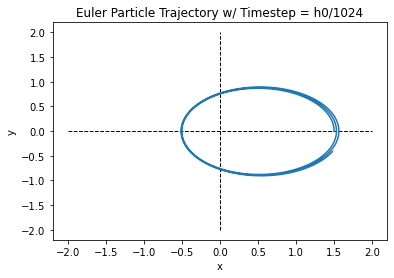

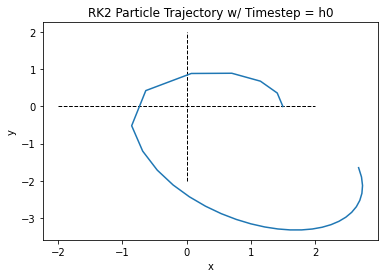

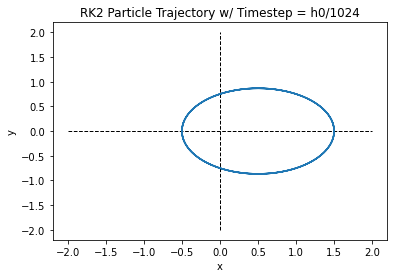

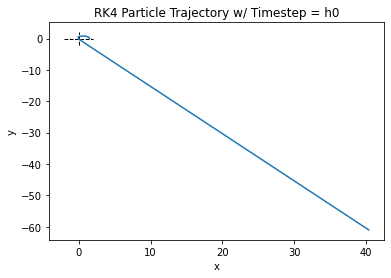

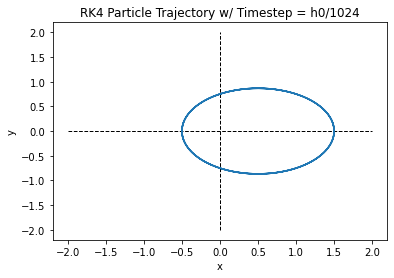

In [ ]:
tend = Tperiod*3
h_plot = [hlist[0], hlist[-1]]
timestep = ['h0', 'h0/1024']

for j in range(len(h_plot)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'Euler')

    hline_y=[0.0,0.0]
    hline_x=[-2*a,2*a]
    vline_y=[-2*a,2*a]
    vline_x=[0,0]

    plt.figure()
    plt.plot(hline_x,hline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(vline_x,vline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(Xs,Ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Euler Particle Trajectory w/ Timestep = '+timestep[j])
    
for j in range(len(h_plot)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK2')

    hline_y=[0.0,0.0]
    hline_x=[-2*a,2*a]
    vline_y=[-2*a,2*a]
    vline_x=[0,0]
    
    plt.figure()
    plt.plot(hline_x,hline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(vline_x,vline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(Xs,Ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('RK2 Particle Trajectory w/ Timestep = '+timestep[j])
    
for j in range(len(h_plot)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK4')

    hline_y=[0.0,0.0]
    hline_x=[-2*a,2*a]
    vline_y=[-2*a,2*a]
    vline_x=[0,0]

    plt.figure()
    plt.plot(hline_x,hline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(vline_x,vline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(Xs,Ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('RK4 Particle Trajectory w/ Timestep = '+timestep[j])

5. The orbit closes only when the the h is low, and it is using the Runge-Kutta methods. When closed, the orbit is an elipse with a semi-major axis of 1.5, which is the planned semi-major axis.

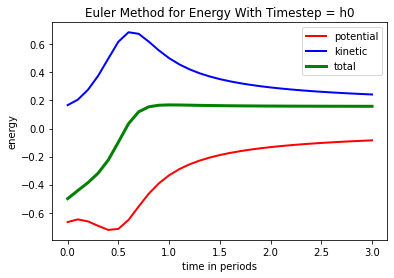

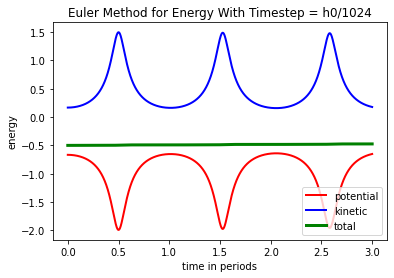

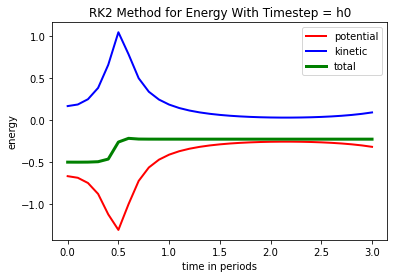

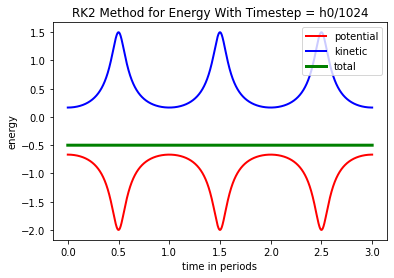

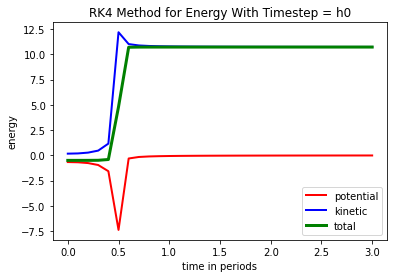

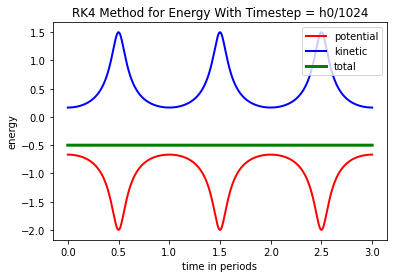

In [ ]:
h_plot = [hlist[0], hlist[-1]]
timestep = ['h0', 'h0/1024']

for j in range(len(h_plot)):

    tend = 3*Tperiod
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'Euler')

    plt.figure()
    plt.plot(ts/Tperiod,PEs,linestyle='-',color='red',lw=2, label = 'potential')
    plt.plot(ts/Tperiod,KEs,linestyle='-',color='blue',lw=2, label = 'kinetic')
    plt.plot(ts/Tperiod,PEs+KEs,linestyle='-',color='green',lw=3, label = 'total')
    plt.title('Euler Method for Energy With Timestep = '+timestep[j])
    plt.xlabel('time in periods')
    plt.ylabel('energy')
    plt.legend()

for j in range(len(h_plot)):

    tend = 3*Tperiod
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK2')

    plt.figure()
    plt.plot(ts/Tperiod,PEs,linestyle='-',color='red',lw=2, label = 'potential')
    plt.plot(ts/Tperiod,KEs,linestyle='-',color='blue',lw=2, label = 'kinetic')
    plt.plot(ts/Tperiod,PEs+KEs,linestyle='-',color='green',lw=3, label = 'total')
    plt.title('RK2 Method for Energy With Timestep = '+timestep[j])
    plt.xlabel('time in periods')
    plt.ylabel('energy')
    plt.legend()

for j in range(len(h_plot)):

    tend = 3*Tperiod
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK4')

    plt.figure()
    plt.plot(ts/Tperiod,PEs,linestyle='-',color='red',lw=2, label = 'potential')
    plt.plot(ts/Tperiod,KEs,linestyle='-',color='blue',lw=2, label = 'kinetic')
    plt.plot(ts/Tperiod,PEs+KEs,linestyle='-',color='green',lw=3, label = 'total')
    plt.title('RK4 Method for Energy With Timestep = '+timestep[j])
    plt.xlabel('time in periods')
    plt.ylabel('energy')
    plt.legend()        
